Version of input file was 1.
Converting current equation_coefficients instance's version to 2.
Version of input file was 1.
Converting current equation_coefficients instance's version to 2.
/home/bjlazard/Rayleigh_Data/NR_project1/Shell_Slices/Shell_Slices/model_1_Shell_Avgs.dat
Version of input file was 1.
Converting current equation_coefficients instance's version to 2.
Version of input file was 1.
Converting current equation_coefficients instance's version to 2.
/home/bjlazard/Rayleigh_Data/NR_project1/Shell_Slices/Shell_Slices/model_2_Shell_Avgs.dat
Version of input file was 1.
Converting current equation_coefficients instance's version to 2.
Version of input file was 1.
Converting current equation_coefficients instance's version to 2.
/home/bjlazard/Rayleigh_Data/NR_project1/Shell_Slices/Shell_Slices/model_3_Shell_Avgs.dat
Version of input file was 1.
Converting current equation_coefficients instance's version to 2.
Version of input file was 1.
Converting current equation_coeffici

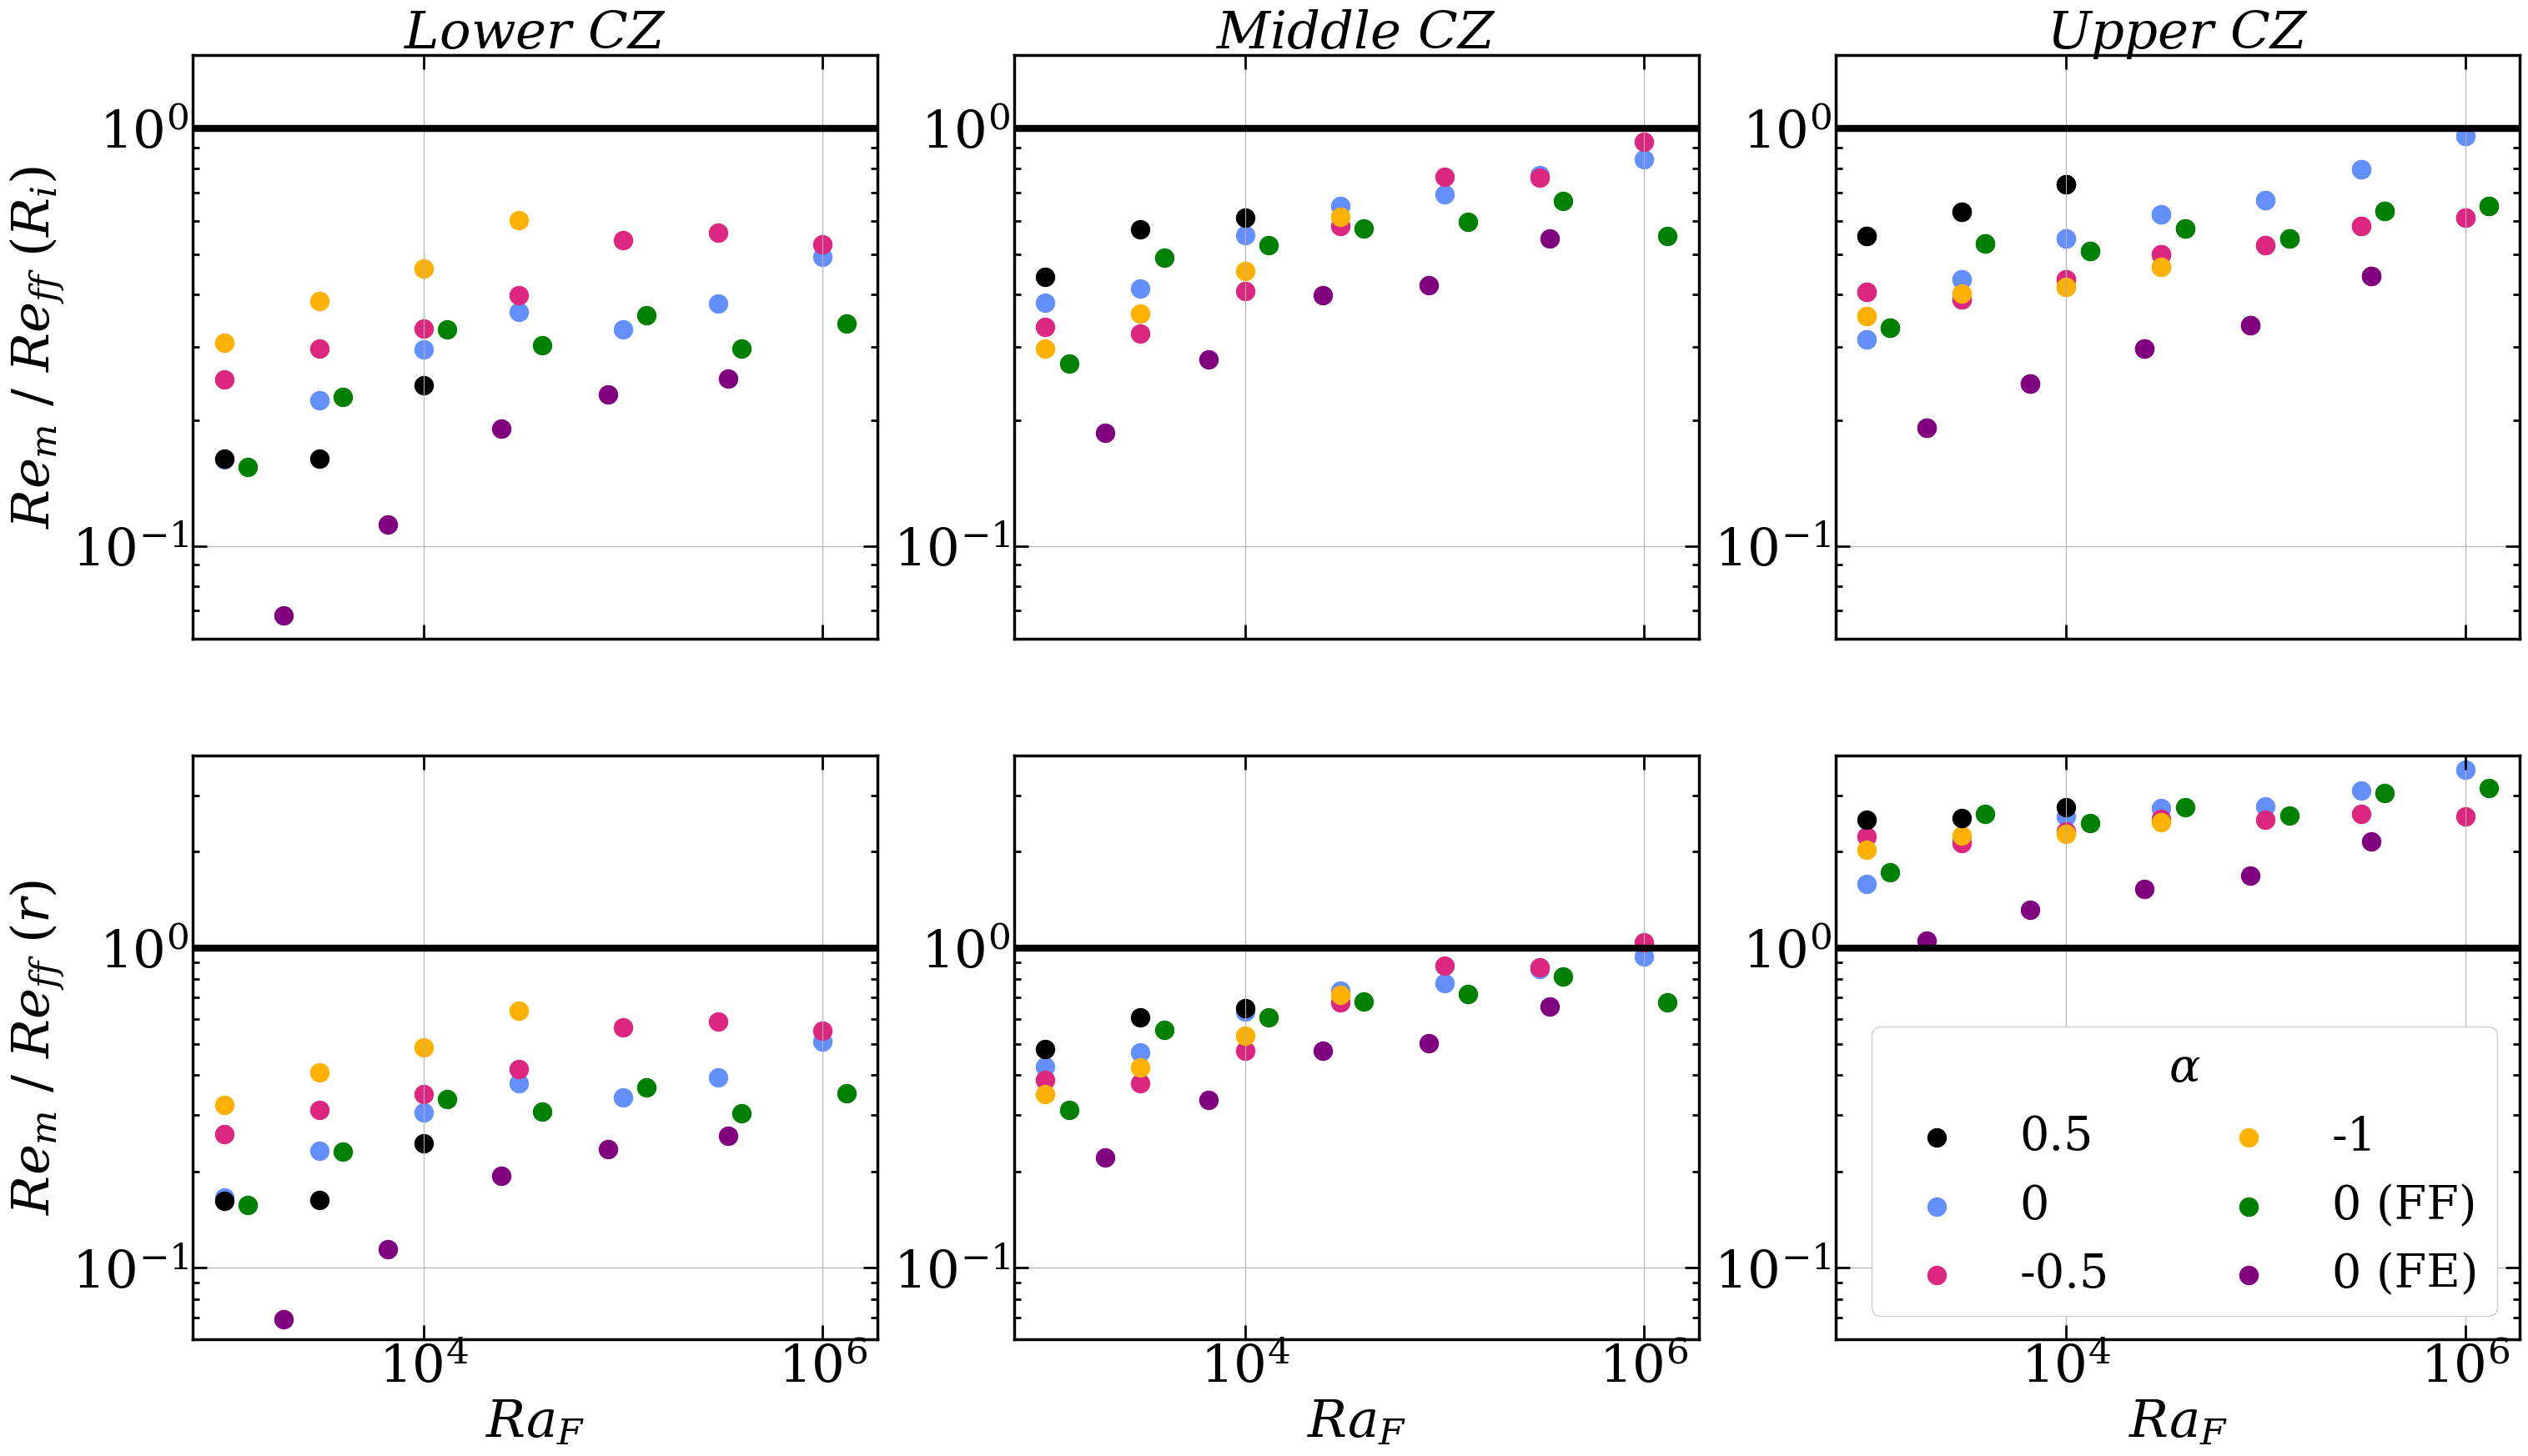

In [10]:
from reference_tools import equation_coefficients, run_int, vol_avg
from rayleigh_diagnostics import G_Avgs, Shell_Slices, Shell_Avgs
from scipy.optimize import curve_fit
from projection import plot_ortho
import survey_utilities as su
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec, colorbar, colors, cm

file = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '1f', '2f', '3f', '4f', '5f', '6f', '7f', '24', '23', '22', '3fx', '4fx', '5fx', '6fx', '7fx']
Re_mod1_top = []
Re_mod2_top = []
Re_mod3_top = []
Re_mod4_top = []
Re_mod1f_top = []
Re_mod1fx_top = []

Re_mod1_mid = []
Re_mod2_mid = []
Re_mod3_mid = []
Re_mod4_mid = []
Re_mod1f_mid = []
Re_mod1fx_mid = []

Re_mod1_bot = []
Re_mod2_bot = []
Re_mod3_bot = []
Re_mod4_bot = []
Re_mod1f_bot = []
Re_mod1fx_bot = []


Re_mod1_ff = []
Re_mod2_ff = []
Re_mod3_ff = []
Re_mod4_ff = []
Re_mod1f_ff = []
Re_mod1fx_ff = []


Raf_model = [1e3, 3e3, 1e4, 3e4, 1e5, 3e5, 1e6]
Raf_model4 = [1e3, 3e3, 1e4]
Raf_model_ff = [1.314e3, 3.94e3, 1.314e4, 3.94e4, 1.314e5, 3.94e5, 1.314e6] 
Raf_model_extra = [1.25e3, 1.5e3, 2e3]
Raf_model_fx = [1992.5982679097528, 6602.7635701334075, 24548.79834765906, 83775.0504486985, 337035.47201444005]


def powerlaw(x, a, b):
    x  = a*(x**b) 
    return x


def U_bff(eqf, saf):
    # This routine calculate the non rotatinf free fall velocity given the equation coefficients file and shell averages file
    from reference_tools import equation_coefficients
    import numpy as np
    from New_Shell_Avgs import Shell_Avgs

    #Read in equation coefficients file
    equation = equation_coefficients(file = eqf)

    #Read in shell averages file
    sa = Shell_Avgs(saf, path = '')

    #Read in g_cp(r)
    radius = equation.radius[::-1]
    rho = equation.functions[0,:][::-1]
    g_over_cp = equation.functions[1][::-1]/rho
    H = np.max(radius) - np.min(radius)
    fpr = 4*np.pi*radius*radius
    gcp_volav = su.vol_avg(g_over_cp, radius)


    #Read in S(r)
    entropy = sa.lut[501]
    S = sa.vals[:, 0, entropy]
    S = S[::-1]
    S = S.transpose()
    S = S[0]
    ds = float(np.max(S) - np.min(S))

    #Run integral of to get U^2
    U_ff = np.sqrt((-2/rho)*run_int((rho*g_over_cp*(S - np.max(S))) / (fpr), radius))

    #Using Keiths formulation to get U_ff for comparison
    u_ff_keith = (ds*H*gcp_volav)**(1/2)
    u_rff_keith = ((ds*gcp_volav)**(2/3))*(H/(1.3e-6))**(1/3)

    return (U_ff, u_rff_keith, u_ff_keith, radius)




#Loop over files to calculate Re
for i in range(1, 34): #34

    shell_path=''
    #Read in shell slices file
    prefix = '/home/bjlazard/Rayleigh_Data/NR_project1/Shell_Slices/Shell_Slices/ss_'
    infile = prefix + file[i-1] 
    s1 = Shell_Slices(infile,path=shell_path)

    #Read in equation coefficients file
    direc = '/home/bjlazard/Rayleigh_Data/NR_project1/eq_coeff/eq_'
    eqfile = direc + file[i-1]
    eq = equation_coefficients(file = eqfile)
    su.nondimensional_parameters(eq)


    #Read in shell avgs file
    prefix = '/home/bjlazard/Rayleigh_Data/NR_project1/Shell_Slices/Shell_Slices/model_'
    suffix = '_Shell_Avgs.dat'
    infile1 = prefix + file[i-1] + suffix
    
    #Read in volume average viscosity
    nu_avg = eq.nu_avg

    #Calculate the Shell depth
    shell_depth = eq.radius[0]-eq.radius[eq.nr-1]


    u_tot = np.sqrt(((s1.vals[:,:,0,s1.lut[1],0])**(2) + (s1.vals[:,:,0,s1.lut[2],0])**(2) + (s1.vals[:,:,0,s1.lut[3],0])**(2)))
    u_tot_max_top = np.max(u_tot)

    u_totmid = np.sqrt(((s1.vals[:,:,4,s1.lut[1],0])**(2) + (s1.vals[:,:,4,s1.lut[2],0])**(2) + (s1.vals[:,:,4,s1.lut[3],0])**(2)))
    u_tot_max_mid = np.max(u_totmid)

    u_totbot = np.sqrt(((s1.vals[:,:,-1,s1.lut[1],0])**(2) + (s1.vals[:,:,-1,s1.lut[2],0])**(2) + (s1.vals[:,:,-1,s1.lut[3],0])**(2)))
    u_tot_max_bot = np.max(u_totbot)

    #Calculate Re
    Re_top = u_tot_max_top*shell_depth/nu_avg
    Re_mid = u_tot_max_mid*shell_depth/nu_avg
    Re_bot = u_tot_max_bot*shell_depth/nu_avg



    if i <= 7:
        Re_mod1_top.append(Re_top)
        Re_mod1_mid.append(Re_mid)
        Re_mod1_bot.append(Re_bot)
        u_ff = U_bff(eqfile, infile1)[0]
        u_ff = np.abs(u_ff - np.max(u_ff))[::-1]
        Re_mod1_ff.append(((u_ff*shell_depth)/nu_avg))
    elif (i >= 8) and (i < 15):
        Re_mod2_top.append(Re_top)
        Re_mod2_mid.append(Re_mid)
        Re_mod2_bot.append(Re_bot)
        u_ff = U_bff(eqfile, infile1)[0]
        u_ff = np.abs(u_ff - np.max(u_ff))[::-1]
        Re_mod2_ff.append(((u_ff*shell_depth)/nu_avg))
    elif (i >= 15) and (i <= 18):
        Re_mod3_top.append(Re_top)
        Re_mod3_mid.append(Re_mid)
        Re_mod3_bot.append(Re_bot)
        u_ff = U_bff(eqfile, infile1)[0]
        u_ff = np.abs(u_ff - np.max(u_ff))[::-1]
        Re_mod3_ff.append(((u_ff*shell_depth)/nu_avg))
    elif (i >= 19) and (i <= 25):  
        Re_mod1f_top.append(Re_top)
        Re_mod1f_mid.append(Re_mid)
        Re_mod1f_bot.append(Re_bot)
        u_ff = U_bff(eqfile, infile1)[0]
        u_ff = np.abs(u_ff - np.max(u_ff))[::-1]
        Re_mod1f_ff.append(((u_ff*shell_depth)/nu_avg))
    elif (i >= 26) and (i <= 28):
        Re_mod4_top.append(Re_top)
        Re_mod4_mid.append(Re_mid)
        Re_mod4_bot.append(Re_bot)
        u_ff = U_bff(eqfile, infile1)[0]
        u_ff = np.abs(u_ff - np.max(u_ff))[::-1]
        Re_mod4_ff.append(((u_ff*shell_depth)/nu_avg))
    else:
        Re_mod1fx_top.append(Re_top)
        Re_mod1fx_mid.append(Re_mid)
        Re_mod1fx_bot.append(Re_bot)
        u_ff = U_bff(eqfile, infile1)[0]
        u_ff = np.abs(u_ff - np.max(u_ff))[::-1]
        Re_mod1fx_ff.append(((u_ff*shell_depth)/nu_avg))

##################################### CONVERT TO NUMPY ARRAYS ############################################
Re_mod1_top = np.array(Re_mod1_top)
Re_mod1_mid = np.array(Re_mod1_mid)
Re_mod1_bot = np.array(Re_mod1_bot)

Re_mod2_top = np.array(Re_mod2_top)
Re_mod2_mid = np.array(Re_mod2_mid)
Re_mod2_bot = np.array(Re_mod2_bot)

Re_mod3_top = np.array(Re_mod3_top)
Re_mod3_mid = np.array(Re_mod3_mid)
Re_mod3_bot = np.array(Re_mod3_bot)

Re_mod4_top = np.array(Re_mod4_top)
Re_mod4_mid = np.array(Re_mod4_mid)
Re_mod4_bot = np.array(Re_mod4_bot)

Re_mod1f_top = np.array(Re_mod1f_top)
Re_mod1f_mid = np.array(Re_mod1f_mid)
Re_mod1f_bot = np.array(Re_mod1f_bot)

Re_mod1fx_top = np.array(Re_mod1fx_top)
Re_mod1fx_mid = np.array(Re_mod1fx_mid)
Re_mod1fx_bot = np.array(Re_mod1fx_bot)

Re_mod1_ff = np.array(Re_mod1_ff)
Re_mod2_ff = np.array(Re_mod2_ff)
Re_mod3_ff = np.array(Re_mod3_ff)
Re_mod4_ff = np.array(Re_mod4_ff)
Re_mod1f_ff = np.array(Re_mod1f_ff)
Re_mod1fx_ff = np.array(Re_mod1fx_ff)



######################## PLOT THE DATA #######################################

#Setup figure
fig, ax = plt.subplots(2, 3, sharex = True, figsize = (36, 20)) 
plt.setp(ax[0, 0].spines.values(), linewidth=2.5)
plt.setp(ax[0, 1].spines.values(), linewidth=2.5)
plt.setp(ax[0, 2].spines.values(), linewidth=2.5)
plt.setp(ax[1, 0].spines.values(), linewidth=2.5)
plt.setp(ax[1, 1].spines.values(), linewidth=2.5)
plt.setp(ax[1, 2].spines.values(), linewidth=2.5)

plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"


marker_size = 250

# --- Plotting the first row of data ---
u1 = ax[0, 2].scatter(Raf_model, Re_mod1_top / Re_mod1_ff[:, -1], marker='o', s=marker_size, color='#648FFF')
m1 = ax[0, 1].scatter(Raf_model, Re_mod1_mid / Re_mod1_ff[:, -1], marker='o', s=marker_size, color='#648FFF')
d1 = ax[0, 0].scatter(Raf_model, Re_mod1_bot / Re_mod1_ff[:, -1], marker='o', s=marker_size, color='#648FFF')

u2 = ax[0, 2].scatter(Raf_model, Re_mod2_top / Re_mod2_ff[:, -1], marker='o', s=marker_size, color='#DC267F')
m2 = ax[0, 1].scatter(Raf_model, Re_mod2_mid / Re_mod2_ff[:, -1], marker='o', s=marker_size, color='#DC267F')
d2 = ax[0, 0].scatter(Raf_model, Re_mod2_bot / Re_mod2_ff[:, -1], marker='o', s=marker_size, color='#DC267F')

u3 = ax[0, 2].scatter(Raf_model[:4], Re_mod3_top / Re_mod3_ff[:, -1], marker='o', s=marker_size, color='#FFB000')
m3 = ax[0, 1].scatter(Raf_model[:4], Re_mod3_mid / Re_mod3_ff[:, -1], marker='o', s=marker_size, color='#FFB000')
d3 = ax[0, 0].scatter(Raf_model[:4], Re_mod3_bot / Re_mod3_ff[:, -1], marker='o', s=marker_size, color='#FFB000')

u4 = ax[0, 2].scatter(Raf_model4, Re_mod4_top / Re_mod4_ff[:, -1], marker='o', s=marker_size, color='black')
m4 = ax[0, 1].scatter(Raf_model4, Re_mod4_mid / Re_mod4_ff[:, -1], marker='o', s=marker_size, color='black')
d4 = ax[0, 0].scatter(Raf_model4, Re_mod4_bot / Re_mod4_ff[:, -1], marker='o', s=marker_size, color='black')

u5 = ax[0, 2].scatter(Raf_model_ff, Re_mod1f_top / Re_mod1f_ff[:, -1], marker='o', s=marker_size, color='green')
m5 = ax[0, 1].scatter(Raf_model_ff, Re_mod1f_mid / Re_mod1f_ff[:, -1], marker='o', s=marker_size, color='green')
d5 = ax[0, 0].scatter(Raf_model_ff, Re_mod1f_bot / Re_mod1f_ff[:, -1], marker='o', s=marker_size, color='green')

u6 = ax[0, 2].scatter(Raf_model_fx, Re_mod1fx_top / Re_mod1fx_ff[:, -1], marker='o', s=marker_size, color='purple')
m6 = ax[0, 1].scatter(Raf_model_fx, Re_mod1fx_mid / Re_mod1fx_ff[:, -1], marker='o', s=marker_size, color='purple')
d6 = ax[0, 0].scatter(Raf_model_fx, Re_mod1fx_bot / Re_mod1fx_ff[:, -1], marker='o', s=marker_size, color='purple')


# --- Plotting the second row of data ---
ax[1, 2].scatter(Raf_model, Re_mod1_top / Re_mod1_ff[:, 13], marker='o', s=marker_size, color='#648FFF')
ax[1, 1].scatter(Raf_model, Re_mod1_mid / Re_mod1_ff[:, 63], marker='o', s=marker_size, color='#648FFF')
ax[1, 0].scatter(Raf_model, Re_mod1_bot / Re_mod1_ff[:, 109], marker='o', s=marker_size, color='#648FFF')

ax[1, 2].scatter(Raf_model, Re_mod2_top / Re_mod2_ff[:, 13], marker='o', s=marker_size, color='#DC267F')
ax[1, 1].scatter(Raf_model, Re_mod2_mid / Re_mod2_ff[:, 63], marker='o', s=marker_size, color='#DC267F')
ax[1, 0].scatter(Raf_model, Re_mod2_bot / Re_mod2_ff[:, 109], marker='o', s=marker_size, color='#DC267F')

ax[1, 2].scatter(Raf_model[:4], Re_mod3_top / Re_mod3_ff[:, 13], marker='o', s=marker_size, color='#FFB000')
ax[1, 1].scatter(Raf_model[:4], Re_mod3_mid / Re_mod3_ff[:, 63], marker='o', s=marker_size, color='#FFB000')
ax[1, 0].scatter(Raf_model[:4], Re_mod3_bot / Re_mod3_ff[:, 109], marker='o', s=marker_size, color='#FFB000')

ax[1, 2].scatter(Raf_model4, Re_mod4_top / Re_mod4_ff[:, 13], marker='o', s=marker_size, color='black')
ax[1, 1].scatter(Raf_model4, Re_mod4_mid / Re_mod4_ff[:, 63], marker='o', s=marker_size, color='black')
ax[1, 0].scatter(Raf_model4, Re_mod4_bot / Re_mod4_ff[:, 109], marker='o', s=marker_size, color='black')

ax[1, 2].scatter(Raf_model_ff, Re_mod1f_top / Re_mod1f_ff[:, 13], marker='o', s=marker_size, color='green')
ax[1, 1].scatter(Raf_model_ff, Re_mod1f_mid / Re_mod1f_ff[:, 63], marker='o', s=marker_size, color='green')
ax[1, 0].scatter(Raf_model_ff, Re_mod1f_bot / Re_mod1f_ff[:, 109], marker='o', s=marker_size, color='green')

ax[1, 2].scatter(Raf_model_fx, Re_mod1fx_top / Re_mod1fx_ff[:, 13], marker='o', s=marker_size, color='purple')
ax[1, 1].scatter(Raf_model_fx, Re_mod1fx_mid / Re_mod1fx_ff[:, 63], marker='o', s=marker_size, color='purple')
ax[1, 0].scatter(Raf_model_fx, Re_mod1fx_bot / Re_mod1fx_ff[:, 109], marker='o', s=marker_size, color='purple')




#Plotting used for secondary legend
l1 = ax[0, 2].scatter(Raf_model, Re_mod1_top / Re_mod1_ff[:, -1], marker = 'o', s = marker_size, color = '#648FFF', label = r'0')
l2 = ax[0, 2].scatter(Raf_model, Re_mod2_top / Re_mod2_ff[:, -1], marker = 'o', s = marker_size, color = '#DC267F', label = r'-0.5')
l3 = ax[0, 2].scatter(Raf_model[:4], Re_mod3_top / Re_mod3_ff[:, -1], marker = 'o', s = marker_size, color = '#FFB000', label = r'-1')
l4 = ax[0, 2].scatter(Raf_model4, Re_mod4_top / Re_mod4_ff[:, -1], marker = 'o', s = marker_size, color = 'black', label = r'0.5')
l5 = ax[0, 2].scatter(Raf_model_ff, Re_mod1f_top / Re_mod1f_ff[:, -1], marker = 'o', s = marker_size, color = 'green', label = r'0 (FF)')
l6 = ax[0, 2].scatter(Raf_model_fx, Re_mod1fx_top / Re_mod1fx_ff[:, -1], marker = 'o', s = marker_size, color = 'purple', label = r'0 (FE)')
l10 = ax[0, 2].scatter(10000, 1, linewidth = 9,  color = 'none', zorder = 2, label = ' ')

legend1 = ax[1, 2].legend(ncol = 2, handles = [l4, l1, l2, l3, l5, l6], title = r'$\alpha$', title_fontsize = 40, loc = 'lower right', fontsize = 40, framealpha = 1)



ax[0, 0].axhline(y = 1, color = 'black', linewidth = 6, zorder = 2)
ax[0, 1].axhline(y = 1, color = 'black', linewidth = 6, zorder = 2)
ax[0, 2].axhline(y = 1, color = 'black', linewidth = 6, zorder = 2)

ax[1, 0].axhline(y = 1, color = 'black', linewidth = 6, zorder = 2)
ax[1, 1].axhline(y = 1, color = 'black', linewidth = 6, zorder = 2)
ax[1, 2].axhline(y = 1, color = 'black', linewidth = 6, zorder = 2)


ax[0, 0].set_ylabel(r'$Re_{m}~/~Re_{ff}~\left(R_i \right)$', fontsize = 45)
ax[1, 0].set_ylabel(r'$Re_{m}~/~Re_{ff}~\left(r \right)$', fontsize = 45)

ax[1, 0].set_xlabel(r'$Ra_F$', fontsize = 45)
ax[1, 1].set_xlabel(r'$Ra_F$', fontsize = 45)
ax[1, 2].set_xlabel(r'$Ra_F$', fontsize = 45)

ax[0, 0].set_yscale('log')
ax[0, 0].set_xscale('log')

ax[0, 1].set_yscale('log')
ax[0, 1].set_xscale('log')

ax[0, 2].set_yscale('log')
ax[0, 2].set_xscale('log')

ax[1, 0].set_yscale('log')
ax[1, 0].set_xscale('log')

ax[1, 1].set_yscale('log')
ax[1, 1].set_xscale('log')

ax[1, 2].set_yscale('log')
ax[1, 2].set_xscale('log')
ax[0, 0].grid()
ax[0, 1].grid()
ax[0, 2].grid()
ax[1, 0].grid()
ax[1, 1].grid()
ax[1, 2].grid()

ax[0, 0].set_ylim(6e-2, 1.5)
ax[0, 1].set_ylim(6e-2, 1.5)
ax[0, 2].set_ylim(6e-2, 1.5)
ax[1, 0].set_ylim(6e-2, 4)
ax[1, 1].set_ylim(6e-2, 4)
ax[1, 2].set_ylim(6e-2, 4)

ax[0, 0].set_title(r'$Lower~CZ$', fontsize = 45)
ax[0, 1].set_title(r'$Middle~CZ$', fontsize = 45)
ax[0, 2].set_title(r'$Upper~CZ$', fontsize = 45)


ax[0, 0].tick_params(which='minor', top = True, direction = 'in', length = 6, width = 2, right = True, labelsize = 45)
ax[0, 0].tick_params(which='major', top = True, direction = 'in', length = 12, width = 2, right = True, labelsize = 45)
ax[0, 1].tick_params(which='minor', top = True, direction = 'in', length = 6, width = 2, right = True, labelsize = 45)
ax[0, 1].tick_params(which='major', top = True, direction = 'in', length = 12, width = 2, right = True, labelsize = 45)
ax[0, 2].tick_params(which='minor', top = True, direction = 'in', length = 6, width = 2, right = True, labelsize = 45)
ax[0, 2].tick_params(which='major', top = True, direction = 'in', length = 12, width = 2, right = True, labelsize = 45)

ax[1, 0].tick_params(which='minor', top = True, direction = 'in', length = 6, width = 2, right = True, labelsize = 45)
ax[1, 0].tick_params(which='major', top = True, direction = 'in', length = 12, width = 2, right = True, labelsize = 45)
ax[1, 1].tick_params(which='minor', top = True, direction = 'in', length = 6, width = 2, right = True, labelsize = 45)
ax[1, 1].tick_params(which='major', top = True, direction = 'in', length = 12, width = 2, right = True, labelsize = 45)
ax[1, 2].tick_params(which='minor', top = True, direction = 'in', length = 6, width = 2, right = True, labelsize = 45)
ax[1, 2].tick_params(which='major', top = True, direction = 'in', length = 12, width = 2, right = True, labelsize = 45)


plt.savefig('Re_ff_plot.pdf', bbox_inches = 'tight', dpi = 300)
